# Welcome to the SAGAN fit tutorial

We are lucky, WFIRST give us a preview event of its work. 
Let's have a look to your choice lightcurve first.

In [1]:
## First import the required libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import time

lib_path = os.path.abspath(os.path.join('../'))
sys.path.append(lib_path)

from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA import microlmodels

First, let 's have a look to this event!

<IPython.core.display.Javascript object>


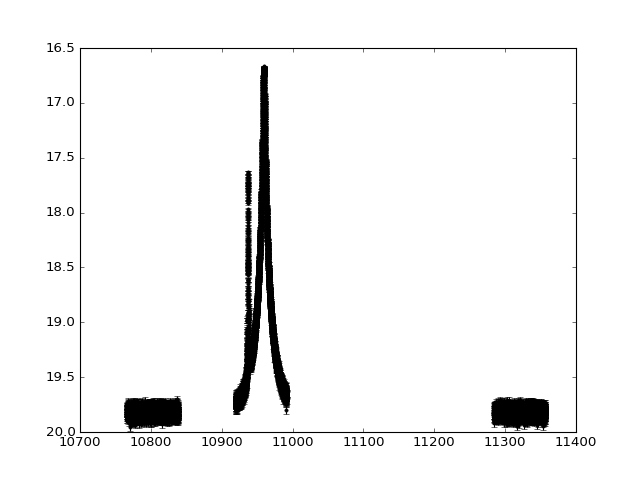

In [2]:
WFIRST_data = np.loadtxt('./WFIRST_binary_SAGAN.dat')[::1]

### Lets have a look on what it is exactly :
plt.errorbar(WFIRST_data[:,0]-2450000,WFIRST_data[:,1],yerr = WFIRST_data[:,2],fmt='.k')
plt.gca().invert_yaxis()
plt.show()


Well, it looks similar to a point-source point lens model except around 7815 HJD. Let's try a PSPL fit then.
To do so, we need to define an event, then define a telescope and add it to the event class.


In [3]:
### Create an event object. You can choose the name and RA,DEC in degrees :

your_event = event.Event()
your_event.name = 'WFIRST binary'
your_event.ra = 269.39166666666665 
your_event.dec = -29.22083333333333

###### Let's define the WFIRST observations

wfirst = telescopes.Telescope(name='WFIRST', camera_filter='I', light_curve_magnitude=WFIRST_data)

your_event.telescopes.append(wfirst)


OK now we can fit this event with a PSPL model. And fit it with a Levenberg-Marquardt algorithm, given the good data quality.


Start fit on WFIRST binary, with model PSPL and method LM
check_event  : Everything looks fine, this event can be fitted
initial_guess  : Initial parameters guess SUCCESS
lmarquardt  : Levenberg_marquardt fit SUCCESS
[2460959.4237093884, 0.045738478986330856, 25.934864681699597, 881.9686067511075, 0.22538814014618594, 359992.3318938436]


<IPython.core.display.Javascript object>


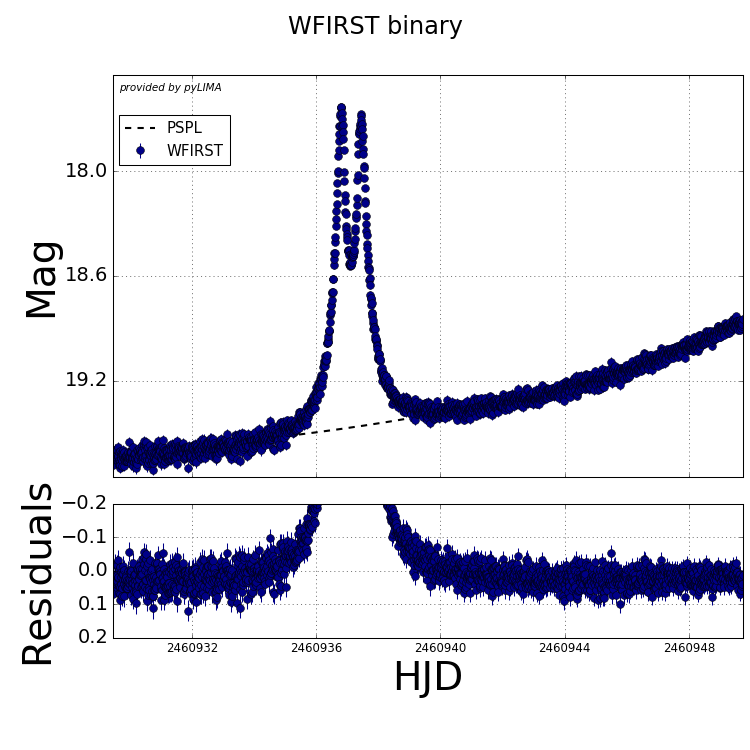

<IPython.core.display.Javascript object>


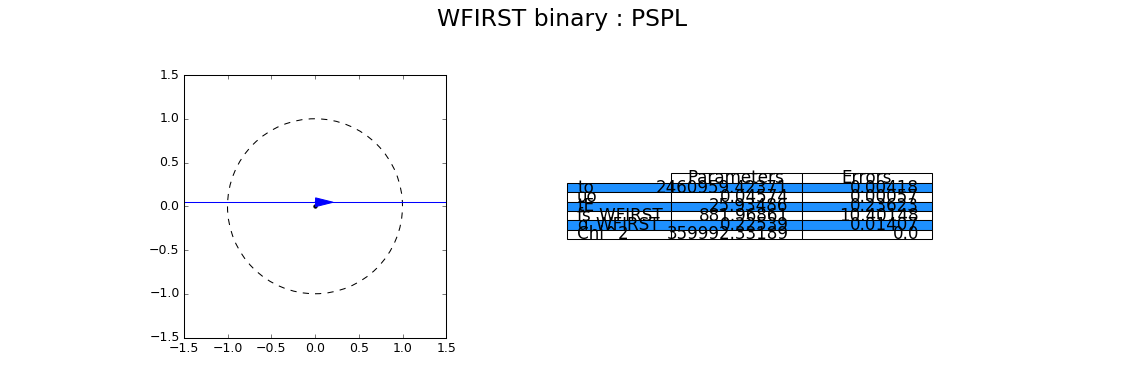

Chi2_LM : 359992.331894


In [4]:
### Construct the model.
pspl_model = microlmodels.create_model('PSPL', your_event)

### Fit your_event with model_1.
your_event.fit(pspl_model,'LM')
your_event.fits[0].produce_outputs()
print 'Chi2_LM :',your_event.fits[0].outputs.fit_parameters.chichi
plt.show()



Hey, not to bad! Given the short duration of the anomaly and the good PSPL fit, this probably mean our anomaly is due to a planet. Then we can make some deduction. To do so, we have to define :

- delta_t = the duration of the anomaly
- delta_A = the amplitude of the anomaly 
- U(t_anomaly) = the impact parameter at the time  of anomaly

You can easily derive these properties by zooming around the anomaly!

In [5]:
### First derive delta_t in days.
delta_t = 2.0

### Then derive delta_I, the amplitude of the anomaly in magnitude unit
delta_I = 19.5-17.8

delta_A = 10**((delta_I)/2.5)

### Then the impact parameter at the anomaly time U(t_anomaly)
t_anomaly = 2460935.5

### Finally, extract PSPL parameters from first fit 
to = your_event.fits[0].outputs.fit_parameters.to
uo = your_event.fits[0].outputs.fit_parameters.uo
tE = your_event.fits[0].outputs.fit_parameters.tE

U_peak  = (uo**2+(t_anomaly-to)**2/tE**2)**0.5


All right! We can then derive some binary parameters using this :

- s = (U_peak +- (U_peak^2+4)^0.5)/2  This is accurate
- rho = delta_t/(2tE) This is NOT accurate
- q = delta_A/2*rho^2 This is NOT accurate

- x_caustic = s - 1/s
- y_caustic_close = 2*q^0.5/(s*(1+s^2)^0.5)
- y_caustic_wide = 0
- gamma = arcsin(uo/U_peak) 
- beta = arcsin(y_caustic/x_caustic)
- alpha = pi/2 - gamma - beta This is accurate

In [6]:
### Let's have s, rho, q and alpha

#Major image deviation
s = np.abs((U_peak+(U_peak**2+4)**0.5)/2)
#Minor image deviation
#s = np.abs((U_peak-(U_peak**2+4)**0.5)/2)


rho = delta_t/(2*tE)

q = rho**2*delta_A/2


x_caustic = s-1/s

if s<1 :
    
    y_caustic = 2*q**0.5/(s*(1+s**2)**0.5)
    
else : 
    
    y_caustic = 0
    
gamma = np.arccos(uo/U_peak)
beta = np.arcsin(y_caustic/x_caustic)

alpha = (np.pi/2-gamma-beta) 


# Geometrical consideration
if s<1 :
    
    if t_anomaly > to:
        
        alpha = np.pi-alpha
else :
    
    if t_anomaly > to:
        alpha = -alpha
        
    else :
        alpha = alpha-np.pi
        
print to
print uo
print tE
print rho
print s
print q
print alpha


2460959.42371
0.0457384789863
25.9348646817
0.0385581344755
1.56327114104
0.00355796794976
-3.09204972704


OK, enough work for you. We have enough guess to fit the event. To be sure, we gonna use a general solver using differential evolution. But thanks to our guess, we can reduce a lot the parameter space!


Start fit on WFIRST binary, with model USBL and method DE
check_event  : Everything looks fine, this event can be fitted
differential_evolution step 1: f(x)= 393007
differential_evolution step 2: f(x)= 393007
differential_evolution step 3: f(x)= 393007
differential_evolution step 4: f(x)= 393007
differential_evolution step 5: f(x)= 372642
differential_evolution step 6: f(x)= 372642
differential_evolution step 7: f(x)= 372642
differential_evolution step 8: f(x)= 372642
differential_evolution step 9: f(x)= 372642
differential_evolution step 10: f(x)= 368649
differential_evolution step 11: f(x)= 368649
differential_evolution step 12: f(x)= 365321
differential_evolution step 13: f(x)= 365321
differential_evolution step 14: f(x)= 361116
differential_evolution step 15: f(x)= 361116
differential_evolution step 16: f(x)= 361116
differential_evolution step 17: f(x)= 361116
differential_evolution step 18: f(x)= 361116
differential_evolution step 19: f(x)= 361116
differential_evolution step 20: 

<IPython.core.display.Javascript object>


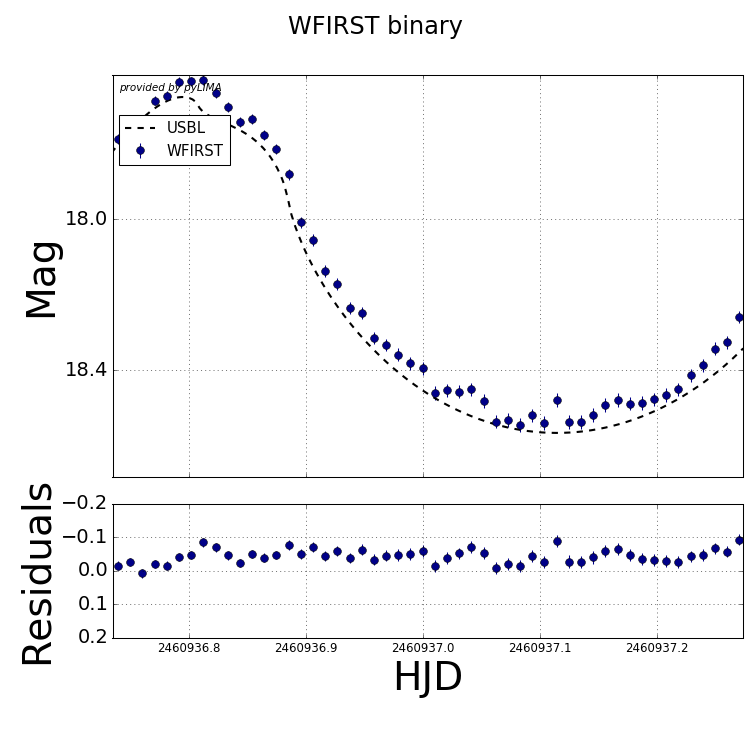

<IPython.core.display.Javascript object>


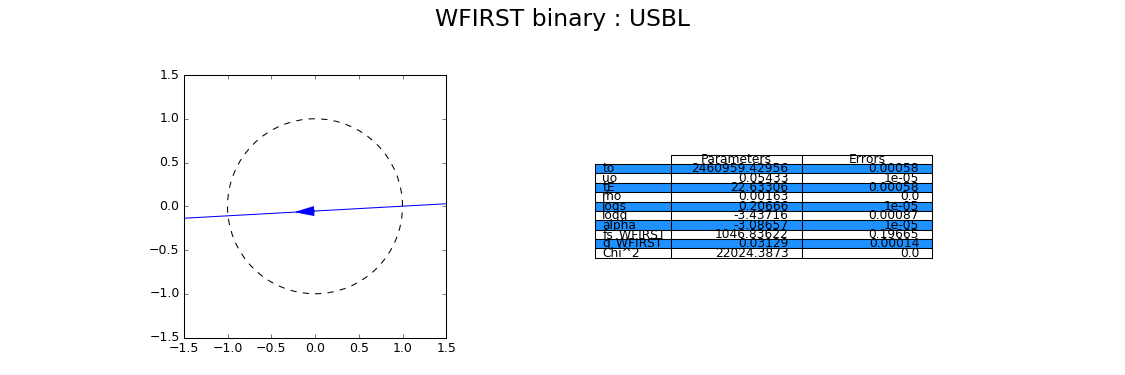

In [8]:
### Let's define a binary model


binary_model = microlmodels.create_model('USBL', your_event, model_arguments = [])

### Speed up computations
binary_model.USBL_windows = [2460932,2460940]

### to boundaries
binary_model.parameters_boundaries[0] = [2460957,2460961]
### uo boundaries
binary_model.parameters_boundaries[1] = [0.01,0.1]
### tE boundaries
binary_model.parameters_boundaries[2] = [20,30]
### rho boundaries
binary_model.parameters_boundaries[3] = [10**-5,10**-2]
### log_10(s) boundaries
binary_model.parameters_boundaries[4] = [0.15,0.25]
### log_10(q) boundaries
binary_model.parameters_boundaries[5] = [-4.0,-2.0]
### alpha boundaries
binary_model.parameters_boundaries[6] = [-np.pi,-2.5]

### DE_population_size scale the size of the DE population. More it is, bigger is your chance to find the minima
### but slower it is.
start = time.time()
your_event.fit(binary_model, 'DE', DE_population_size = 5)
print time.time()-start

import pdb; pdb.set_trace()
your_event.fits[-1].produce_outputs()
plt.show()

Congrats for you binary fit!
